In [3]:
using MAT, PyPlot, LaTeXStrings, LinearAlgebra, Printf
include("../codes/al_approx.jl")

semilogyseparate! (generic function with 1 method)

In [21]:
#Try on matrix
include("../codes/MMT.jl")
# Numerical Simulation Parameters
N = 2^11
k = vcat(collect(0:N/2), collect(-N/2+1:-1)) # implies domain length is 2π
kind = vcat(collect(Int(N/2)+2:N), collect(1:Int(N/2)+1))
kindnz = vcat(collect(Int(N/2)+2:N), collect(2:Int(N/2))) # indexing w/o zero mode

# Linear operator (depends on k)
L = im*abs.(k).^fP.α; L = Diagonal(L); # should be negative but rat approx was on [0,2pi]
h = 2*pi/maximum(abs.(L.diag)); 
@printf("Step-size is set to %f, which makes the largest argument be 2 pi.\n", h)
trueexpL = exp(h*L);

#Find the rational approximations of degree (i)
r = Array{Any, 1}(undef, 5);
errexpL = Array{Any, 1}(undef, 5)
absErr = Array{Any, 1}(undef, 5)
phaseErr = Array{Any, 1}(undef, 5)
for i = 4 : 8
    r[i-3] = evalrat(h*L, "../codes/polzer"*string(i))
    errexpL[i-3] = trueexpL - r[i-3]
    absErr[i-3] = abs.(r[i-3]) - I
    phaseErr[i-3] = abs.(angle.(conj.(trueexpL).*r[i-3]))
end

import ColorSchemes.rainbow
J = Int(N/2+1)
display(rainbow) #This is the colorscheme from 0 to 1.

Step-size is set to 0.196350, which makes the largest argument be 2 pi.


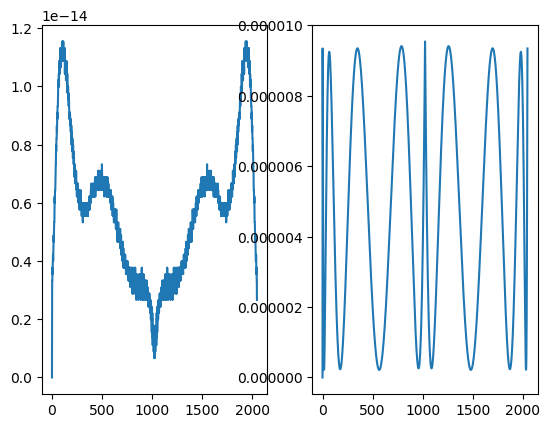

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7facd4d0c910>

In [25]:
subplot(1,2,1)
plot(diag(absErr[1]))
subplot(1,2,2)
plot(diag(phaseErr[1]))

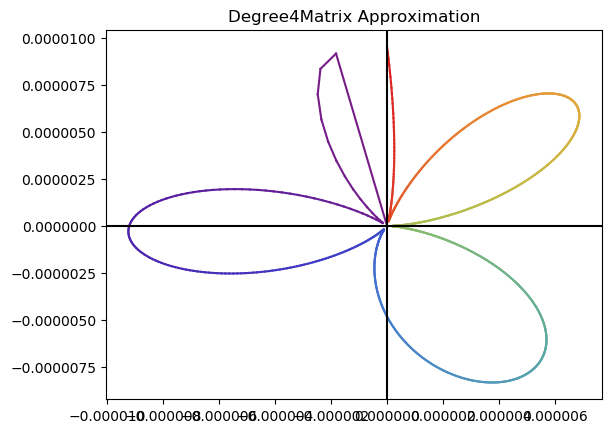

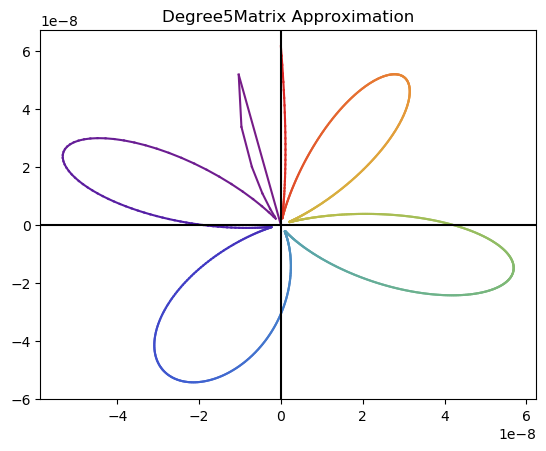

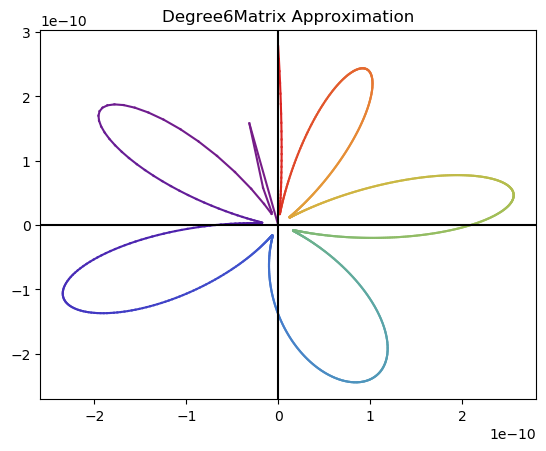

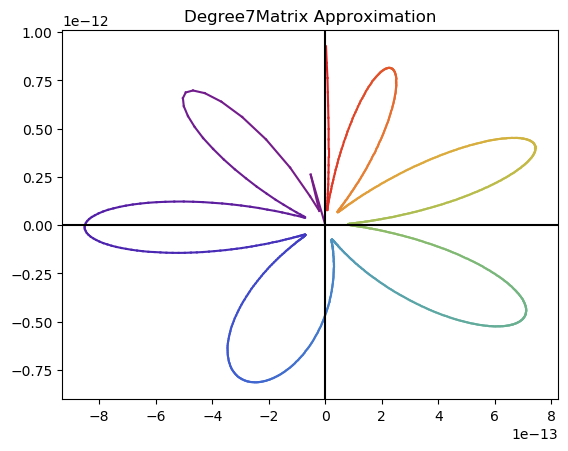

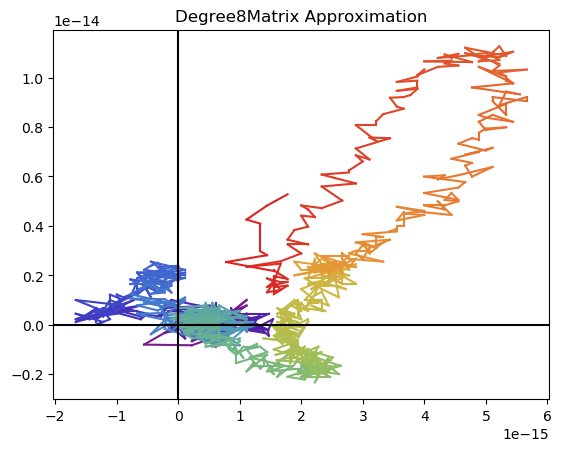

In [23]:
for i = 4 : 8
    plotcomplex!(errexpL[i-3], i)
end

In [ ]:
J = Int(N/2)+1
fig, ax = subplots()
for i = 4 : 8
    semilogyseparate!(errexpL[i-3], i, J)
end
title("Errors for different degree approximations")

In [ ]:
for i = 4 : 8
    plotseparate!(errexpL[i-3], i, J)
end

# Hmm.. what's going on? Let's check scalar case.

In [ ]:
z = im*collect(range(0, stop=2*pi, length=2048))
truesexpL = exp.(z);

#Find the rational approximations of degree (i)
rs = Array{Any, 1}(undef, 5);
errsexpL = Array{Any, 1}(undef, 5)
for i = 4 : 8
    rs[i-3] = evalrat(z, "../codes/polzer"*string(i))
    errsexpL[i-3] = truesexpL - rs[i-3]
end

In [ ]:
for i = 4 : 8
    plotcomplex!(errsexpL[i-3], i, "scalar")
end